### Import all neccessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the data 

In [3]:
df = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')


### Inspecting the Observation Dataframe

In [4]:
df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


The Observations dataset consists of Three(3) columns 
- **scientific_name** Which contains the scientiific name of the animals
- **park_name** Contains names of all the National Parks 
- **observations**  the number of times each specie was seen during the period the data was collected

From the information from `df.info()` above its safe  to say there are no missing values 

### Inspecting the Species Dataframe

In [6]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The Species Dataset contains Four(4) columns
- **category** Which contains different types of species of living things
- **scientific_name** Which contains the scientiific name of the species
- **common_names** Which contain local names for each species, also "English names".
- **conservation_status** The species conservation status 


In [7]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [8]:
non_empty_rows = species[species['conservation_status'].notna()]
non_empty_rows.head()

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern


From our `species.info()` code we see that 3 of the column fields are complete and the `conservation_status` column has only 191 occupied fields out of 5824, with the `non_empty_rows` call i was able to deduce that the fields with "missing data" aren't in fact missing, It shows that the species without a conservation_status are not in danger and do not need to be conserved 

### Exploring the data

The Species data has drawn the first piece of concern so let's go deeper to see more of what it actually holds

In [9]:
print(f"There are {species.category.nunique()} different species of Living things in this table")
print(f"And they are {species.category.unique()}")

There are 7 different species of Living things in this table
And they are ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [10]:
species_count = species.category.value_counts()
print(species_count)

category
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: count, dtype: int64


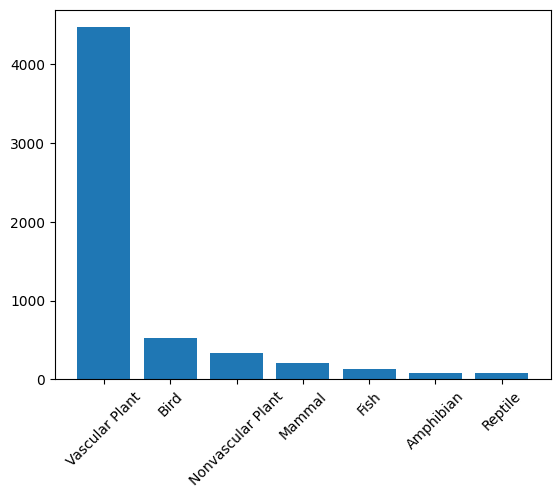

In [11]:
plt.bar(species_count.index, species_count.values)
plt.xticks(rotation=45)
plt.show()

From the observation in the Bar Chart above we can see that `Vascular plants` are the most represented in this dataset with 4470 

Now over to the conservation status column, let's find out how many different levels of conservation are available

In [12]:
print(species.conservation_status.value_counts())

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


As we see there are four levels of conservation : `Species of Concern, Endangered, Threatened `and `In Recovery`

I guess that's about it for Exploring the `Species` data for now, we will be back for more analysis but first let's see what the `Observations` dataset contains

In [13]:
df.park_name.value_counts()

park_name
Great Smoky Mountains National Park    5824
Yosemite National Park                 5824
Bryce National Park                    5824
Yellowstone National Park              5824
Name: count, dtype: int64

There are Four different parks which observations were made from and each park contains sightings of 5824 species each  

In [14]:
df.observations.sum()

3314739

There's been `3,314,739` Total Sightings across the 4 National Parks in our Dataset

Finding out the most Seen species across the Parks in our dataset

In [15]:
max_observation_index = df['observations'].idxmax()
most_obv_name = df.loc[max_observation_index, 'scientific_name',]
most_obv = df.loc[max_observation_index, 'observations']
print(most_obv_name, 'is the most sighted species with', most_obv, 'observations')

Lycopodium tristachyum is the most sighted species with 321 observations


In [37]:
mostob_species = species[species['scientific_name'].isin(
    ['Lycopodium tristachyum'])]
mostob_species

,category,scientific_name,common_names,conservation_status,Protection_Status
1760,Vascular Plant,Lycopodium tristachyum,"Deep-Root Clubmoss, Ground Cedar",No Intervention,False


### ANALYSIS
Now it's time to go deeper in analysis to see what the datasets present, Looking back at the `conservation_status` column in our `species.csv` dataset  

The first step now will be to clean the column given the null fields do not require any form of conservation, let's fill every null field with `No Intervention`

In [38]:
species.fillna('No Intervention', inplace=True)
species.conservation_status.value_counts()

conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64

Now let's see the distribution of each category of specie in each method of conservation 

In [39]:
conserved = species[species.conservation_status != 'No Intervention']
conserved_table = conserved.groupby('category').conservation_status.value_counts().unstack()
conserved_table = conserved_table.transpose()
conserved_table

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


From the table above, those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals.

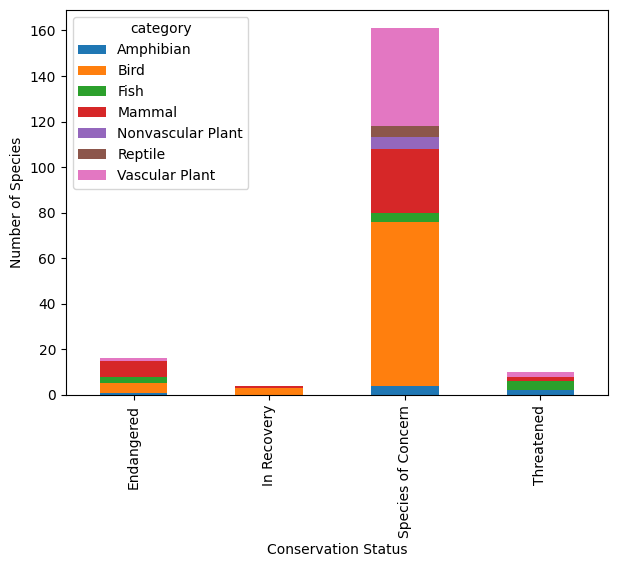

In [40]:
ax = conserved_table.plot(kind='bar', figsize=(7,5), stacked=True )
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.show()

The Bar chart above is just a little visualisation of the short summaries made before

Next we want to check for which species are the most likely to require intervention, Firstly I'll create a new column separating Endangered species and those that require `No Intervention` 

In [41]:
species['Protection_Status'] = species.conservation_status != 'No Intervention'
int_check =  species.groupby(['category', 'Protection_Status']).scientific_name.nunique().reset_index()\
    .pivot(columns='Protection_Status',
           index='category',
           values='scientific_name')
int_check.columns = ['not_protected', 'protected']
int_check


,not_protected,protected
category,,
Amphibian,72,7
Bird,413,75
Fish,115,11
Mammal,146,30
Nonvascular Plant,328,5
Reptile,73,5
Vascular Plant,4216,46


The numbers in the table may not be able to tell what species are more likely to be Endangered so its best to create a new column fot percentages to find out 

In [42]:
int_check['percentage_protected'] = (int_check.protected / (int_check.not_protected + int_check.protected )) * 100
int_check

,not_protected,protected,percentage_protected
category,,,
Amphibian,72,7,8.860759
Bird,413,75,15.368852
Fish,115,11,8.730159
Mammal,146,30,17.045455
Nonvascular Plant,328,5,1.501502
Reptile,73,5,6.410256
Vascular Plant,4216,46,1.079305


From the table above it's evident that `Mammals` are more likely to be protected with `17%`of its representation being protected while `Birds` are second with `15%`, Then we can also see that `Plants (Vascular and Nonvascular)` are the least likely to be protected with just under `3%` for both